# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 50
numberOfSurroundingCells = 4
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1, 50]# The width of a singe cell.
filename = 'test1'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Now generating space.
Done generating space.
Predicted amount of calculations: 10304200 for 50 datapoints.
Assuming 19 us per calculation, estimated time needed: 196 seconds
  2 % done, expected time left 192 seconds, 7 seconds since start.
  4 % done, expected time left 188 seconds, 15 seconds since start.
  6 % done, expected time left 185 seconds, 32 seconds since start.
  8 % done, expected time left 181 seconds, 49 seconds since start.
 10 % done, expected time left 177 seconds, 65 seconds since start.
 12 % done, expected time left 173 seconds, 82 seconds since start.
 14 % done, expected time left 169 seconds, 98 seconds since start.
 16 % done, expected time left 165 seconds, 115 seconds since start.
 18 % done, expected time left 161 seconds, 132 seconds since start.
 20 % done, expected time left 157 seconds, 148 seconds since start.
 22 % done, expected time left 153 seconds, 165 seconds since start.
 24 % done, expected time left 149 seconds, 182 seconds since start.
 26 % 

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

"""
data = dataRead
#"""

dataRead.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[35.3016067046, 11.6537560837], [47.645100144...",49.679623,4,0.000069
1,"[[7.6855216388, 4.9290844552], [3.950825496600...",14.963442,4,0.214303
2,"[[4.13215163, 5.3899354119], [0.9190841816, 5....",8.417127,4,40.519377
3,"[[5.5031882941, 23.3480440734], [24.5466553229...",27.170121,4,-0.000012
4,"[[19.9082160751, 17.0262983133], [18.899327046...",20.983414,4,0.000036


## Merging files

In [6]:
toMerge = ['test1', 'test2']# File names of the things to merge.
#toMerge = ['database1_300k', 'database2_100k']
#outputFilename = 'combinedData'
outputFilename = 'testCombined'

dataFrames = []
for name in toMerge:
    imported = pd.read_json(name + '.json', orient='columns')
    #imported['particleCoordinates'] = imported['particleCoordinates'].apply(np.array)
    dataFrames.append(imported)

total = pd.concat(dataFrames, ignore_index = True, sort = False)
total.to_json(outputFilename + '.json', orient='columns')

## Inspecting data

In [7]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[35.30160670457778, 11.653756083686966], [47....",49.679623,4,0.000069
1,"[[7.685521638772529, 4.929084455186734], [3.95...",14.963442,4,0.214303
2,"[[4.132151629977108, 5.389935411949346], [0.91...",8.417127,4,40.519377
3,"[[5.503188294106206, 23.348044073374673], [24....",27.170121,4,-0.000012
4,"[[19.908216075119945, 17.026298313283256], [18...",20.983414,4,0.000036


In [8]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,50.000000,50.0,5.000000e+01
mean,23.334026,4.0,7.317852e+07
std,13.921790,0.0,3.712034e+08
min,1.072690,4.0,-1.228161e-05
25%,10.539639,4.0,3.019715e-04
50%,25.672472,4.0,9.050785e-03
75%,32.657739,4.0,6.205737e+00
max,49.679623,4.0,2.249069e+09


Plotting datapoint  0  with energy  6.864130767135951e-05


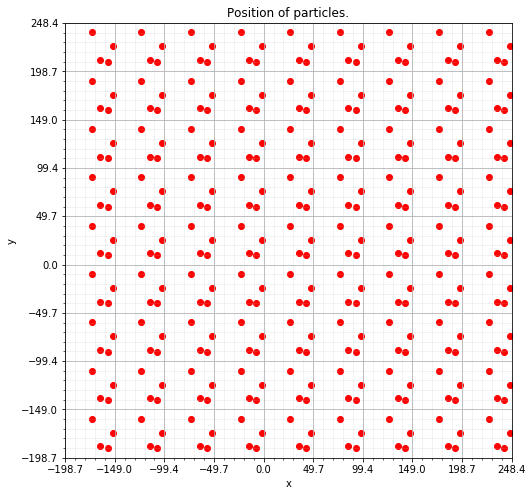

Plotting datapoint  1  with energy  0.2143028360647453


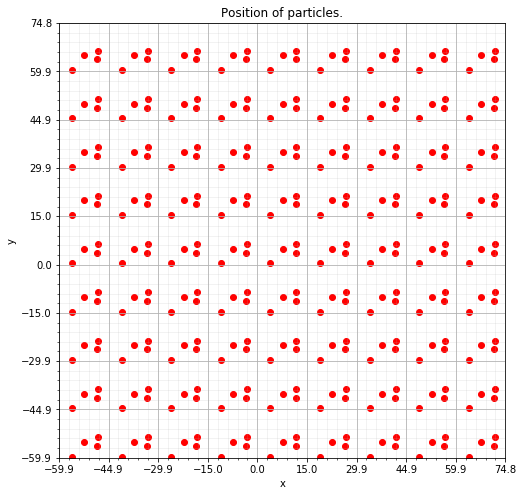

Plotting datapoint  2  with energy  40.519376610903294


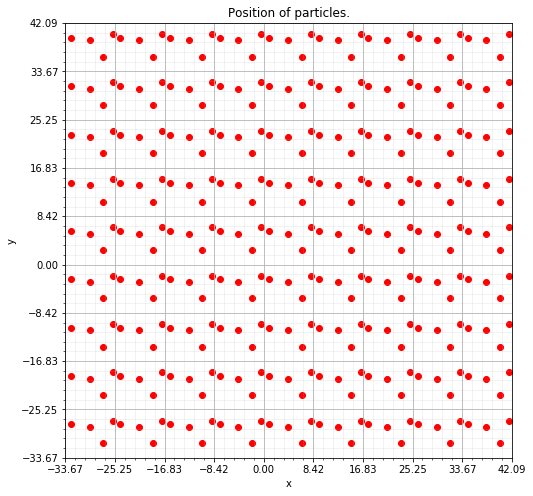

Plotting datapoint  3  with energy  -1.2281605298129558e-05


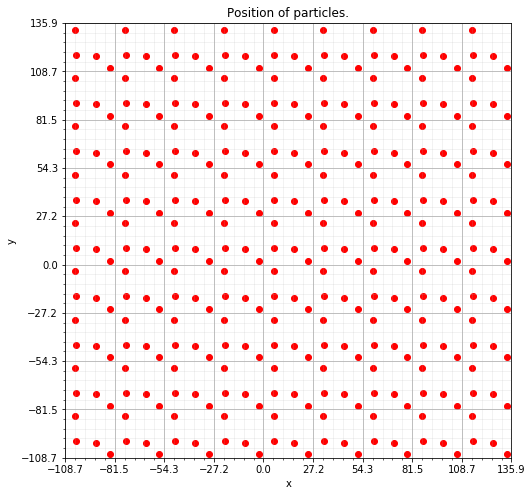

Plotting datapoint  4  with energy  3.623326192989786e-05


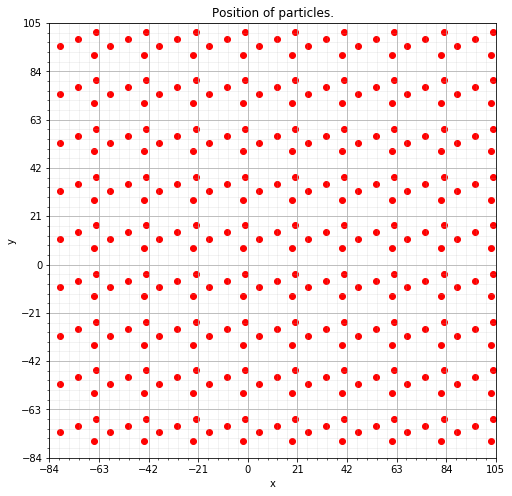

Plotting datapoint  5  with energy  18205.166940744453


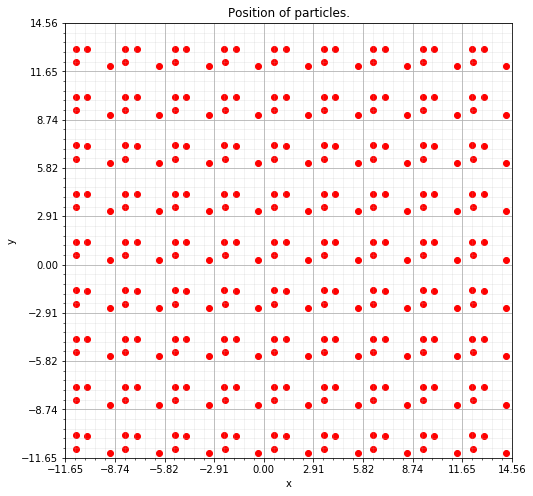

Plotting datapoint  6  with energy  7.530674236578671e-06


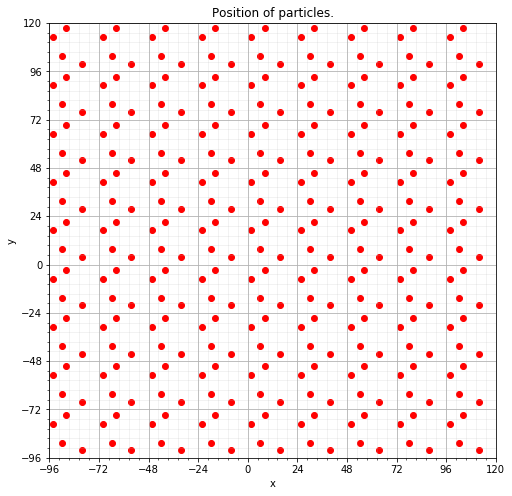

Plotting datapoint  7  with energy  0.00016937710968226746


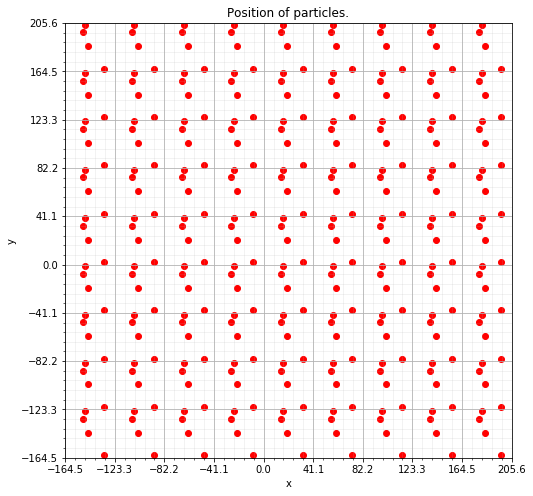

Plotting datapoint  8  with energy  43.62228884945633


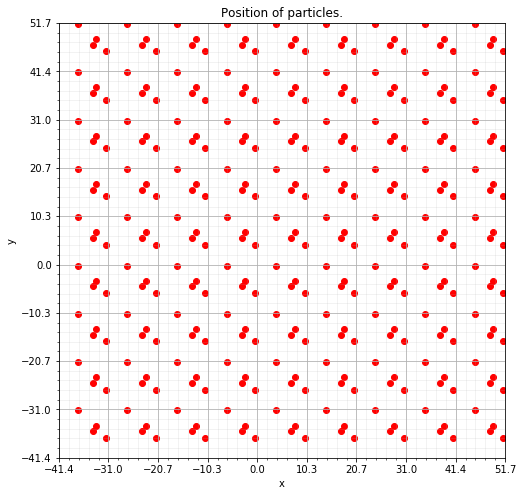

Plotting datapoint  9  with energy  5.056635458477413


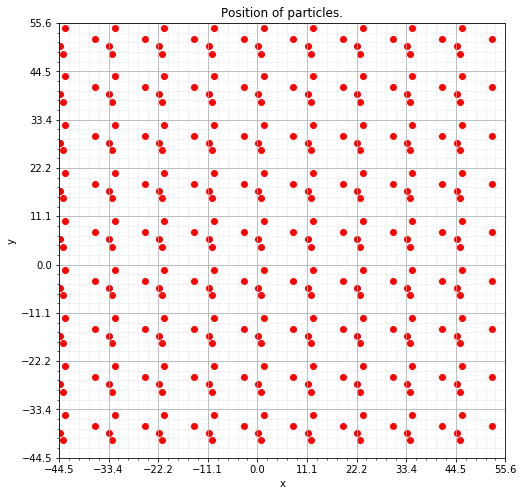

In [9]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

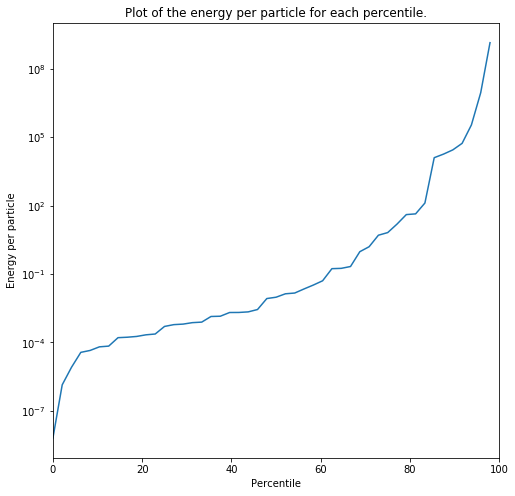

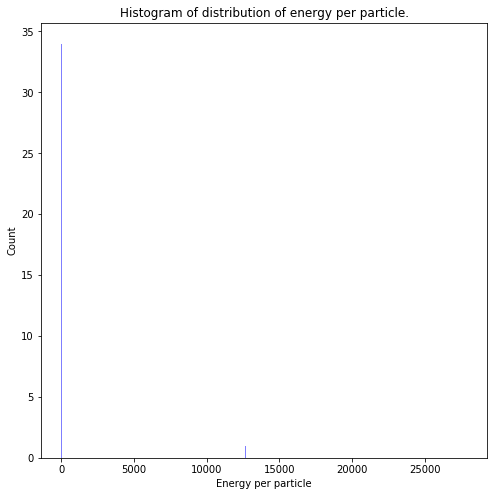

In [10]:
## The code below is for plotting diagrams.
# Filter the data for the percentile plot.
qLow = data['potentialEnergy'].quantile(0.01)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
#bins = [5**i for i in range(math.floor(math.log(max(min(x), 10**-30)) / math.log(5)) - 4, 26)]

# Make the percentile plot.
fig, ax = plt.subplots(figsize=(8, 8))
sortedX = np.sort(x) + 1.01 * abs(min(x))
ax.plot([100*i/len(x) for i in range(0, len(x))], sortedX)
ax.set_xlim(0, 100)
ax.set_yscale('log')
ax.set_title('Plot of the energy per particle for each percentile.')
ax.set_ylabel('Energy per particle')
ax.set_xlabel('Percentile')
plt.show()

# Filter the data for the normal historgram.
qLow = data['potentialEnergy'].quantile(0.10)
qHi  = data['potentialEnergy'].quantile(0.90)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

# Make the normal historgram.
fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

# Prepare database for machine learning

In [11]:
R0 = 100

In [12]:
dataPrepared = prepareDatabseForMachineLearning(data, [-1, -2], R0)

  2 % done, expected time left 2 seconds, 1 seconds since start.
  4 % done, expected time left 4 seconds, 1 seconds since start.
  6 % done, expected time left 6 seconds, 1 seconds since start.
  8 % done, expected time left 5 seconds, 1 seconds since start.
 10 % done, expected time left 5 seconds, 1 seconds since start.
 12 % done, expected time left 17 seconds, 3 seconds since start.
 14 % done, expected time left 15 seconds, 3 seconds since start.
 16 % done, expected time left 13 seconds, 3 seconds since start.
 18 % done, expected time left 12 seconds, 3 seconds since start.
 20 % done, expected time left 11 seconds, 3 seconds since start.
 22 % done, expected time left 10 seconds, 3 seconds since start.
 24 % done, expected time left 9 seconds, 3 seconds since start.
 26 % done, expected time left 8 seconds, 3 seconds since start.
 28 % done, expected time left 8 seconds, 3 seconds since start.
 30 % done, expected time left 15 seconds, 7 seconds since start.
 32 % done, expect

In [13]:
print(dataPrepared['eigenvalues'][0])

dataPrepared.head()

[-13.620971411845332, -5.3966235916843495, -2.5321258760896286, 57.54516955486618, -180.3901501759461, -20.484812766392995, 11.280985492545147, 234.68550717655148]


,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues
0,0,"[[35.30160670457778, 11.653756083686966], [47....",49.679623,4,0.000069,"[-13.620971411845332, -5.3966235916843495, -2...."
1,1,"[[7.685521638772529, 4.929084455186734], [3.95...",14.963442,4,0.214303,"[-37.07724472859397, -22.94436338703765, -9.16..."
2,2,"[[4.132151629977108, 5.389935411949346], [0.91...",8.417127,4,40.519377,"[-68.5685047424098, -31.984867556803714, -13.2..."
3,3,"[[5.503188294106206, 23.348044073374673], [24....",27.170121,4,-0.000012,"[-12.235719046302266, -10.003643471026471, -8...."
4,4,"[[19.908216075119945, 17.026298313283256], [18...",20.983414,4,0.000036,"[-14.546688540869527, -13.452743625878155, -11..."
